![image](https://images.pexels.com/photos/4201333/pexels-photo-4201333.jpeg)

_Photo by Markus from Pexels.com_

# Image Augmentation for Deep Learning                    
#### - _to improve the training performance_                                                                                                   
#### - _to reduce overfitting for image classification tasks._

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Without Image Augmentation

In [9]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=10,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 1000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 500 images = batch_size * steps
      verbose=2)


Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/100
100/100 - 14s - loss: 0.6963 - accuracy: 0.4980 - val_loss: 0.6861 - val_accuracy: 0.5020 - 14s/epoch - 143ms/step
Epoch 2/100
100/100 - 14s - loss: 0.6807 - accuracy: 0.5590 - val_loss: 0.6678 - val_accuracy: 0.6700 - 14s/epoch - 135ms/step
Epoch 3/100
100/100 - 13s - loss: 0.6590 - accuracy: 0.6100 - val_loss: 0.6502 - val_accuracy: 0.6520 - 13s/epoch - 133ms/step
Epoch 4/100
100/100 - 14s - loss: 0.6364 - accuracy: 0.6240 - val_loss: 0.6300 - val_accuracy: 0.6620 - 14s/epoch - 143ms/step
Epoch 5/100
100/100 - 14s - loss: 0.6146 - accuracy: 0.6550 - val_loss: 0.6104 - val_accuracy: 0.6880 - 14s/epoch - 143ms/step
Epoch 6/100
100/100 - 14s - loss: 0.5813 - accuracy: 0.6830 - val_loss: 0.5912 - val_accuracy: 0.6980 - 14s/epoch - 140ms/step
Epoch 7/100
100/100 - 14s - loss: 0.5486 - accuracy: 0.7210 - val_loss: 0.5836 - val_accuracy: 0.6800 - 14s/epoch - 145ms/step
Epoch 8/100
100/100 - 14s - 

Epoch 65/100
100/100 - 16s - loss: 0.0045 - accuracy: 0.9980 - val_loss: 1.7577 - val_accuracy: 0.7380 - 16s/epoch - 160ms/step
Epoch 66/100
100/100 - 17s - loss: 0.0065 - accuracy: 0.9990 - val_loss: 1.8198 - val_accuracy: 0.7340 - 17s/epoch - 169ms/step
Epoch 67/100
100/100 - 16s - loss: 0.0048 - accuracy: 0.9990 - val_loss: 1.8015 - val_accuracy: 0.7480 - 16s/epoch - 164ms/step
Epoch 68/100
100/100 - 16s - loss: 3.1431e-05 - accuracy: 1.0000 - val_loss: 1.7049 - val_accuracy: 0.7560 - 16s/epoch - 163ms/step
Epoch 69/100
100/100 - 16s - loss: 0.0154 - accuracy: 0.9990 - val_loss: 1.8318 - val_accuracy: 0.7400 - 16s/epoch - 162ms/step
Epoch 70/100
100/100 - 16s - loss: 3.7874e-05 - accuracy: 1.0000 - val_loss: 1.9932 - val_accuracy: 0.7340 - 16s/epoch - 163ms/step
Epoch 71/100
100/100 - 16s - loss: 0.0065 - accuracy: 0.9970 - val_loss: 1.7610 - val_accuracy: 0.7560 - 16s/epoch - 164ms/step
Epoch 72/100
100/100 - 16s - loss: 8.3333e-05 - accuracy: 1.0000 - val_loss: 1.7813 - val_accura

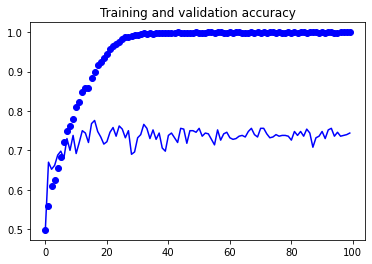

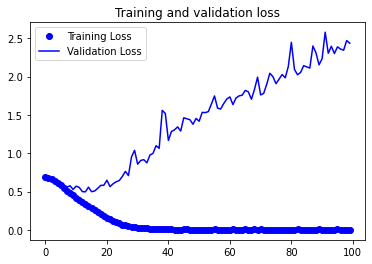

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### With tensorflow build-in Image Augmentation

In [58]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 10 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=10,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 1000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 500 images = batch_size * steps
      verbose=2)


Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/100
100/100 - 16s - loss: 0.6954 - accuracy: 0.5010 - val_loss: 0.6893 - val_accuracy: 0.5760 - 16s/epoch - 164ms/step
Epoch 2/100
100/100 - 15s - loss: 0.6854 - accuracy: 0.5640 - val_loss: 0.6810 - val_accuracy: 0.5100 - 15s/epoch - 151ms/step
Epoch 3/100
100/100 - 16s - loss: 0.6807 - accuracy: 0.5740 - val_loss: 0.6642 - val_accuracy: 0.6380 - 16s/epoch - 156ms/step
Epoch 4/100
100/100 - 16s - loss: 0.6749 - accuracy: 0.5700 - val_loss: 0.6730 - val_accuracy: 0.5400 - 16s/epoch - 158ms/step
Epoch 5/100
100/100 - 16s - loss: 0.6619 - accuracy: 0.5910 - val_loss: 0.6444 - val_accuracy: 0.6280 - 16s/epoch - 158ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6566 - accuracy: 0.6050 - val_loss: 0.6390 - val_accuracy: 0.6300 - 16s/epoch - 160ms/step
Epoch 7/100
100/100 - 16s - loss: 0.6437 - accuracy: 0.6300 - val_loss: 0.6061 - val_accuracy: 0.6880 - 16s/epoch - 159ms/step
Epoch 8/100
100/100 - 16s - 

Epoch 65/100
100/100 - 18s - loss: 0.4489 - accuracy: 0.7860 - val_loss: 0.5185 - val_accuracy: 0.7580 - 18s/epoch - 181ms/step
Epoch 66/100
100/100 - 18s - loss: 0.4470 - accuracy: 0.7950 - val_loss: 0.5430 - val_accuracy: 0.7320 - 18s/epoch - 181ms/step
Epoch 67/100
100/100 - 19s - loss: 0.4623 - accuracy: 0.7830 - val_loss: 0.4848 - val_accuracy: 0.7620 - 19s/epoch - 188ms/step
Epoch 68/100
100/100 - 18s - loss: 0.4501 - accuracy: 0.7910 - val_loss: 0.4832 - val_accuracy: 0.7620 - 18s/epoch - 178ms/step
Epoch 69/100
100/100 - 18s - loss: 0.4325 - accuracy: 0.8090 - val_loss: 0.5218 - val_accuracy: 0.7520 - 18s/epoch - 176ms/step
Epoch 70/100
100/100 - 18s - loss: 0.4503 - accuracy: 0.7980 - val_loss: 0.4858 - val_accuracy: 0.7600 - 18s/epoch - 176ms/step
Epoch 71/100
100/100 - 18s - loss: 0.4491 - accuracy: 0.7880 - val_loss: 0.4766 - val_accuracy: 0.7620 - 18s/epoch - 181ms/step
Epoch 72/100
100/100 - 18s - loss: 0.4618 - accuracy: 0.7840 - val_loss: 0.4783 - val_accuracy: 0.7680 -

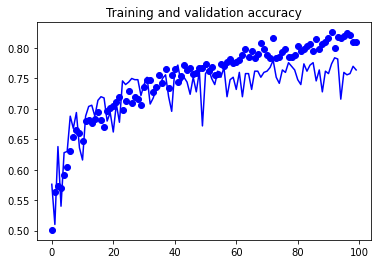

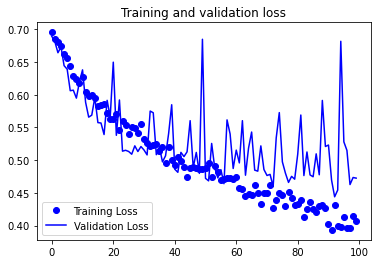

In [59]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### With imgaug Package Image Augmentation

In [63]:
!pip install --upgrade imgaug

Defaulting to user installation because normal site-packages is not writeable


#### Generating augmented images for all cats and dogs images using imgaug package

In [4]:
# import the library and helpers
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
from matplotlib import cm
import random
import imgaug.augmenters.flip as flip
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import numpy as np


for i in range(500):
    # use imageio library to read the image (alternatively you can use OpenCV cv2.imread() function)
    image = imageio.imread('./cats_and_dogs_filtered/train/cats/cat.{}.jpg'.format(i))

    # initialize the augmenters for demo
    rotate = iaa.Affine(rotate=(-random.randrange(90), random.randrange(90))) # rotate image
    crop = iaa.Crop(percent=(0, 0.4)) # crop image
    hue = iaa.AddToHueAndSaturation((-60, 60))  # change their color
    elastic_trans = iaa.ElasticTransformation(alpha=90, sigma=9) # water-like effect
    coarse_drop = iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)# set large image areas to zero
    clahe = iaa.AllChannelsCLAHE(clip_limit=(1, 10), per_channel=True)

    # define an augmentation pipeline
    aug_pipeline = iaa.Sequential([
        iaa.Sometimes(0.5, iaa.GaussianBlur((0, 3.0))), # apply Gaussian blur with a sigma between 0 and 3 to 50% of the images
        # apply one of the augmentations: Dropout or CoarseDropout
        iaa.OneOf([
            iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
            iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
        ]),
        # apply from 0 to 3 of the augmentations from the list
        iaa.SomeOf((0, 3),[
            iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
            iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
            iaa.Fliplr(1.0), # horizontally flip
            iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.25, 0.25))), # crop and pad 50% of the images
            iaa.Sometimes(0.5, iaa.Affine(rotate=5)) # rotate 50% of the images
        ])
    ],
    random_order=True # apply the augmentations in random order
    )
    
    # get augmented images
    image_rotated = rotate.augment_images([image])
    image_crop = crop.augment_images([image])
    image_hue = hue.augment_images([image])
    image_trans = elastic_trans.augment_images([image])
    image_coarse = coarse_drop.augment_images([image])
    image_pipeline = aug_pipeline.augment_image(image)
    image_pipeline2 = aug_pipeline.augment_image(image)
    image_clahe = clahe.augment_images([image])
    image_flip = flip.flipud(image)

    # create an array of augmented images for the demo
    images_aug = [image_rotated[0], image_crop[0], image_hue[0], image_trans[0], image_coarse[0],image_clahe[0], image_flip, image_pipeline,image_pipeline2]


    # export the image files
    for j in range(len(images_aug)):
        im = TF.to_pil_image(np.array(images_aug[j]))
        im.save("cat.{}_{}.jpg".format(i,j))

In [76]:
base_dir = './cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train_with_aug')
validation_dir = os.path.join(base_dir, 'validation')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 100x100
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 10 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=10,
        class_mode='binary')

history_aug = model.fit(
      train_generator,
      steps_per_epoch=200,  # 10000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,  # 500 images = batch_size * steps
      verbose=2)

Found 10000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/20
200/200 - 112s - loss: 0.6767 - accuracy: 0.5768 - val_loss: 0.6544 - val_accuracy: 0.6280 - 112s/epoch - 560ms/step
Epoch 2/20
200/200 - 112s - loss: 0.6332 - accuracy: 0.6397 - val_loss: 0.5923 - val_accuracy: 0.7240 - 112s/epoch - 558ms/step
Epoch 3/20
200/200 - 114s - loss: 0.5817 - accuracy: 0.6920 - val_loss: 0.5563 - val_accuracy: 0.7440 - 114s/epoch - 570ms/step
Epoch 4/20
200/200 - 121s - loss: 0.5388 - accuracy: 0.7312 - val_loss: 0.5276 - val_accuracy: 0.7440 - 121s/epoch - 603ms/step
Epoch 5/20
200/200 - 125s - loss: 0.5006 - accuracy: 0.7592 - val_loss: 0.5418 - val_accuracy: 0.7260 - 125s/epoch - 626ms/step
Epoch 6/20
200/200 - 126s - loss: 0.4620 - accuracy: 0.7818 - val_loss: 0.4939 - val_accuracy: 0.7560 - 126s/epoch - 628ms/step
Epoch 7/20
200/200 - 127s - loss: 0.4184 - accuracy: 0.8108 - val_loss: 0.4877 - val_accuracy: 0.7480 - 127s/epoch - 635ms/step
Epoch 8/20
200/200 -

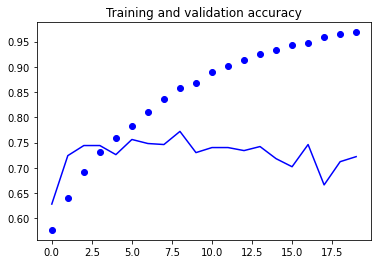

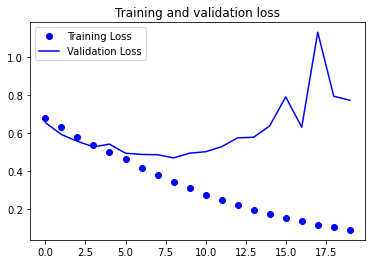

In [77]:
import matplotlib.pyplot as plt
acc = history_aug.history['accuracy']
val_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
val_loss = history_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## More examples for get augmented images

#### imgaug package Examples

In [3]:
! pip install --upgrade imgaug

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


Augmentation of a single image:

In [6]:
# import the library and helpers
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
from matplotlib import cm
import random
import imgaug.augmenters.flip as flip


# use imageio library to read the image (alternatively you can use OpenCV cv2.imread() function)
image = imageio.imread('./cats_and_dogs_filtered/train/cats/cat.0.jpg')

# initialize the augmenters for demo
rotate = iaa.Affine(rotate=(-random.randrange(90), random.randrange(90))) # rotate image
crop = iaa.Crop(percent=(0, 0.4)) # crop image
hue = iaa.AddToHueAndSaturation((-60, 60))  # change their color
elastic_trans = iaa.ElasticTransformation(alpha=90, sigma=9) # water-like effect
coarse_drop = iaa.CoarseDropout((0.01, 0.1), size_percent=0.01)# set large image areas to zero
clahe = iaa.AllChannelsCLAHE(clip_limit=(1, 10), per_channel=True)

# define an augmentation pipeline
aug_pipeline = iaa.Sequential([
    iaa.Sometimes(0.5, iaa.GaussianBlur((0, 3.0))), # apply Gaussian blur with a sigma between 0 and 3 to 50% of the images
    # apply one of the augmentations: Dropout or CoarseDropout
    iaa.OneOf([
        iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
        iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
    ]),
    # apply from 0 to 3 of the augmentations from the list
    iaa.SomeOf((0, 3),[
        iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
        iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
        iaa.Fliplr(1.0), # horizontally flip
        iaa.Sometimes(0.5, iaa.CropAndPad(percent=(-0.25, 0.25))), # crop and pad 50% of the images
        iaa.Sometimes(0.5, iaa.Affine(rotate=5)) # rotate 50% of the images
    ])
],
random_order=True # apply the augmentations in random order
)

Text(0.5, 1.0, 'Sample augmentations')

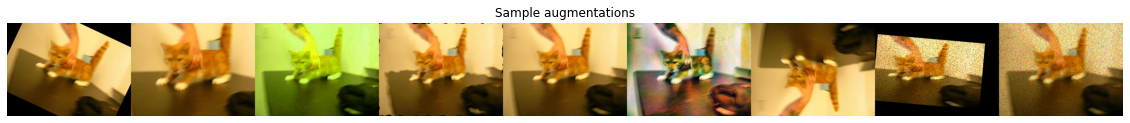

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# get augmented images
image_rotated = rotate.augment_images([image])
image_crop = crop.augment_images([image])
image_hue = hue.augment_images([image])
image_trans = elastic_trans.augment_images([image])
image_coarse = coarse_drop.augment_images([image])
image_pipeline = aug_pipeline.augment_image(image)
image_pipeline2 = aug_pipeline.augment_image(image)
image_clahe = clahe.augment_images([image])
image_flip = flip.flipud(image)

# create an array of augmented images for the demo
images_aug = [image_rotated[0], image_crop[0], image_hue[0], image_trans[0], image_coarse[0],image_clahe[0], image_flip, image_pipeline,image_pipeline2]

# plot augmentation examples
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(np.hstack(images_aug))
plt.title('Sample augmentations')

Augmentation of an image with mask:

#### Albumentations package Examples

In [10]:
pip install -U albumentations

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached albumentations-1.1.0-py3-none-any.whl (102 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.5.2
    Uninstalling albumentations-0.5.2:
      Successfully uninstalled albumentations-0.5.2
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew

Demonstration of single image augmentations:

In [14]:
# Helper function to display the images in a grid
# Source: https://stackoverflow.com/questions/42040747/more-idiomatic-way-to-display-images-in-a-grid-with-numpy
def gallery(array, ncols=3):
    '''
    Function to arange images into a grid.
    INPUT:
        array - numpy array containing images
        ncols - number of columns in resulting imahe grid
    OUTPUT:
        result - reshaped array into a grid with given number of columns
    '''
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

Text(0.5, 1.0, 'Augmentation examples')

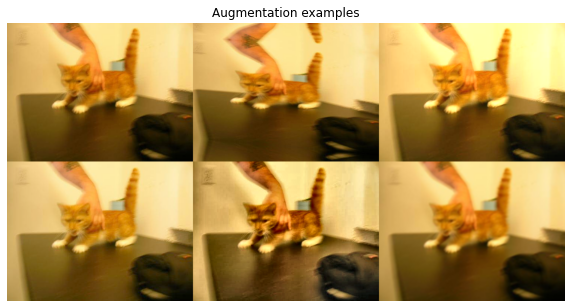

In [15]:
# import albumentations package
import albumentations as A

# initialize augmentations
gaus_noise = A.GaussNoise() # gaussian noise
elastic = A.ElasticTransform() # elastic transform
bright_contrast = A.RandomBrightnessContrast(p=1) # random brightness and contrast
gamma = A.RandomGamma(p=1) # random gamma
clahe = A.CLAHE(p=1) # CLAHE (see https://en.wikipedia.org/wiki/Adaptive_histogram_equalization#Contrast_Limited_AHE)
blur = A.Blur()

# apply augmentations
# pass image to the augmentation
img_gaus = gaus_noise(image = image)
img_elastic = elastic(image = image)
img_bc = bright_contrast(image = image)
img_gamma = gamma(image = image)
img_clahe = clahe(image = image)
img_blur = blur(image = image)

# access the augmented image by 'image' key
img_list = [img_gaus['image'], img_elastic['image'], img_bc['image'], img_gamma['image'], img_clahe['image'], img_blur['image']]

# visualize the augmented images
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(gallery(np.array(img_list), ncols = 3))
plt.title('Augmentation examples')

Augmentation pipelines:

In [16]:
# compose complex augmentation pipeline
augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p = 0.5), # apply horizontal flip to 50% of images
        A.OneOf(
            [
                # apply one of transforms to 50% of images
                A.RandomContrast(), # apply random contrast
                A.RandomGamma(), # apply random gamma
                A.RandomBrightness(), # apply random brightness
            ],
            p = 0.5
        ),
        A.OneOf(
            [
                # apply one of transforms to 50% images
                A.ElasticTransform(
                    alpha = 120,
                    sigma = 120 * 0.05,
                    alpha_affine = 120 * 0.03
                ),
                A.GridDistortion(),
                A.OpticalDistortion(
                    distort_limit = 2,
                    shift_limit = 0.5
                ),
            ],
            p = 0.5
        )
    ],
    p = 1
)

/opt/homebrew/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1826: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:1800: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


Text(0.5, 1.0, 'Augmentation pipeline examples')

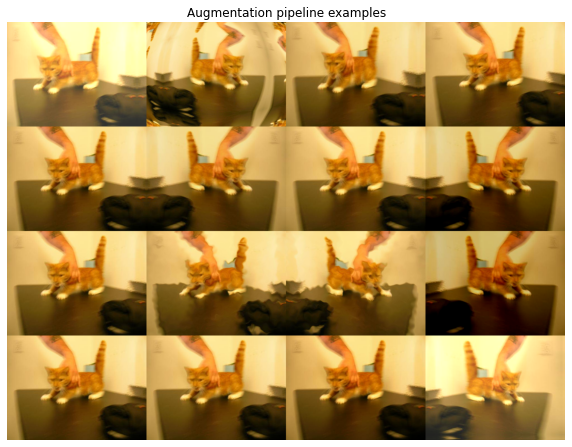

In [17]:
# apply pipeline to sample image
images_aug = np.array([augmentation_pipeline(image = image)['image'] for _ in range(16)])

# visualize augmentation results
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(gallery(images_aug, ncols = 4))
plt.title('Augmentation pipeline examples')

End